In [1]:
!pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.6 MB/s eta 0:00:00


In [2]:
from tensorflow.keras import backend as K
K.clear_session()

In [3]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=654addd682e87bb7a295cb8197d76f406e2f19c7dd6e7fc2c89e994767fec6de
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [4]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
import sys
import pickle
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import imblearn
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.metrics import confusion_matrix,accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import ensemble
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Layer
from keras.layers import Flatten
from keras.layers import Dense
# from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Convolution1D
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
import keras
from keras import Model, Sequential, backend
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
from keras.layers import Input
from keras.utils import to_categorical

In [5]:
#data loading
# df = pd.read_csv('/content/drive/MyDrive/energy_theft_detection/Data/data.csv',index_col=0)
df = pd.read_csv('/content/dataset.csv',index_col=0)
df.head(5)

Electricity:Facility [kW](Hourly)  Fans:Electricity [kW](Hourly)  \
0                                                                     
0                          22.035977                       3.586221   
1                          14.649757                       0.000000   
2                          14.669567                       0.000000   
3                          14.677808                       0.000000   
4                          14.824794                       0.000000   

   Cooling:Electricity [kW](Hourly)  Heating:Electricity [kW](Hourly)  \
0                                                                       
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   InteriorLights:Electricity [kW](Hourly)  \
0                                            
0                                 4.589925   
1                                 1.529975   
2                                 1.529975   
3                                 1.529975   
4                                 1.529975   

   InteriorEquipment:Electricity [kW](Hourly)  Gas:Facility [kW](Hourly)  \
0                                                                          
0                                      8.1892                 136.585903   
1                                      7.4902                   3.359880   
2                                      7.4902                   3.359880   
3                                      7.4902                   3.931932   
4                                      7.4902                   3.359880   

   Heating:Gas [kW](Hourly)  InteriorEquipment:Gas [kW](Hourly)  \
0                                                                 
0                123.999076                             3.33988   
1                  0.000000                             3.33988   
2                  0.000000                             3.33988   
3                  0.000000                             3.33988   
4                  0.000000                             3.33988   

   Water Heater:WaterSystems:Gas [kW](Hourly)                  Class   theft  
0                                                                             
0                                    9.246947  FullServiceRestaurant  Normal  
1                                    0.020000  FullServiceRestaurant  Normal  
2                                    0.020000  FullServiceRestaurant  Normal  
3                                    0.592052  FullServiceRestaurant  Normal  
4                                    0.020000  FullServiceRestaurant  Normal

In [6]:
df.isna().sum()

Electricity:Facility [kW](Hourly)             0
Fans:Electricity [kW](Hourly)                 0
Cooling:Electricity [kW](Hourly)              0
Heating:Electricity [kW](Hourly)              0
InteriorLights:Electricity [kW](Hourly)       0
InteriorEquipment:Electricity [kW](Hourly)    0
Gas:Facility [kW](Hourly)                     0
Heating:Gas [kW](Hourly)                      0
InteriorEquipment:Gas [kW](Hourly)            0
Water Heater:WaterSystems:Gas [kW](Hourly)    0
Class                                         0
theft                                         0
dtype: int64

In [7]:
df.describe()

Electricity:Facility [kW](Hourly)  Fans:Electricity [kW](Hourly)  \
count                      560655.000000                  560655.000000   
mean                          161.775593                      13.798083   
std                           287.323654                      24.078277   
min                             0.000000                       0.000000   
25%                            15.843234                       0.240958   
50%                            48.197262                       3.557599   
75%                           155.448375                      14.962478   
max                          1726.432223                     240.015298   

       Cooling:Electricity [kW](Hourly)  Heating:Electricity [kW](Hourly)  \
count                     560655.000000                     560655.000000   
mean                          43.770035                          0.836993   
std                          117.101272                          6.123290   
min                            0.000000                          0.000000   
25%                            0.000000                          0.000000   
50%                            0.078813                          0.000000   
75%                           16.838516                          0.000000   
max                          890.621907                        277.996520   

       InteriorLights:Electricity [kW](Hourly)  \
count                            560655.000000   
mean                                 32.988238   
std                                  65.177701   
min                                   0.000000   
25%                                   3.005316   
50%                                   9.233307   
75%                                  34.382155   
max                                 448.566544   

       InteriorEquipment:Electricity [kW](Hourly)  Gas:Facility [kW](Hourly)  \
count                               560655.000000              560655.000000   
mean                                    42.631944                  77.310902   
std                                     73.493664                 178.680306   
min                                      0.000000                   0.000000   
25%                                      4.950048                   1.103003   
50%                                     15.988889                  11.905720   
75%                                     41.401920                  66.165380   
max                                    448.566544                4491.695087   

       Heating:Gas [kW](Hourly)  InteriorEquipment:Gas [kW](Hourly)  \
count             560655.000000                       560655.000000   
mean                  53.917106                            8.163785   
std                  157.721787                           15.954861   
min                    0.000000                            0.000000   
25%                    0.000000                            0.000000   
50%                    0.083226                            0.451244   
75%                   36.185902                            7.575135   
max                 4480.732902                           91.799800   

       Water Heater:WaterSystems:Gas [kW](Hourly)  
count                               560655.000000  
mean                                    15.230010  
std                                     52.634413  
min                                      0.000000  
25%                                      0.014510  
50%                                      1.103452  
75%                                      8.517566  
max                                    783.877898

In [8]:
#number of unique value in each columns
for i in df.columns:
  print(i,df[i].unique().size)

Electricity:Facility [kW](Hourly) 440970
Fans:Electricity [kW](Hourly) 235209
Cooling:Electricity [kW](Hourly) 285123
Heating:Electricity [kW](Hourly) 54180
InteriorLights:Electricity [kW](Hourly) 101480
InteriorEquipment:Electricity [kW](Hourly) 106278
Gas:Facility [kW](Hourly) 413472
Heating:Gas [kW](Hourly) 280419
InteriorEquipment:Gas [kW](Hourly) 54323
Water Heater:WaterSystems:Gas [kW](Hourly) 336322
Class 17
theft 7


In [9]:
#value count of each columns
for i in df.columns:
  print(i,df[i].value_counts())

Electricity:Facility [kW](Hourly) 0.000000     22973
15.415824     4558
12.569684     4278
15.106999     4183
38.936184     3483
             ...  
45.256203        1
44.460738        1
43.742182        1
43.109645        1
52.376832        1
Name: Electricity:Facility [kW](Hourly), Length: 440970, dtype: int64
Fans:Electricity [kW](Hourly) 0.000000     127509
2.297647       5020
4.088366       4920
4.315089       4659
2.212556       4591
              ...  
29.598834         1
29.598961         1
29.598534         1
29.597882         1
0.341940          1
Name: Fans:Electricity [kW](Hourly), Length: 235209, dtype: int64
Cooling:Electricity [kW](Hourly) 0.000000      255483
120.410243        22
121.175822        21
119.345502        17
124.928457        17
               ...  
69.636757          1
68.535266          1
71.390902          1
74.365523          1
0.177802           1
Name: Cooling:Electricity [kW](Hourly), Length: 285123, dtype: int64
Heating:Electricity [kW](Hourly) 0.000

In [10]:
#dropping unappropriate values from the dataset
df = df[df['Class'] != '0']

# Data Visualization

In [11]:
#pie chart of target class(teft) (from the below plot we find data is imbalanced)
df1 = df['theft'].value_counts().reset_index().rename(columns={'index':'theft','theft':'count'})
fig = px.pie(df1, values='count', names='theft')
fig.show()

In [12]:
#bar plot : value count of class column
df2 = df[['Class']].groupby(['Class']).value_counts()
df2 = df2.reset_index()
df2.columns = ['Class','counts']
fig = px.bar(df2, x='Class', y='counts',color='Class',title='value count of Class column')
fig.show()

In [13]:
#histogram : data distribution of 'Electricity:Facility [kW](Hourly)' column
fig = px.histogram(df, x="Electricity:Facility [kW](Hourly)" , title="Electricity:Facility [kW](Hourly) Distribution",color_discrete_sequence=['indianred'])
fig.show()

In [14]:
#value count of class wise theft
df_temp = df[['Class','theft']].groupby(['Class','theft']).value_counts()
df_temp = df_temp.reset_index()
df_temp.columns = ['Class','theft','count']
fig = px.bar(df_temp, x='Class', y='count',color='theft',barmode="group")
fig.show()


In [15]:
col = df.select_dtypes(exclude=['float64','int64']).columns.tolist()
col

['Class', 'theft']

In [16]:
#label encoding(converting categorical data to number)
le = LabelEncoder()
df[col] = df[col].apply(le.fit_transform)

In [17]:
df.head()

Electricity:Facility [kW](Hourly)  Fans:Electricity [kW](Hourly)  \
0                                                                     
0                          22.035977                       3.586221   
1                          14.649757                       0.000000   
2                          14.669567                       0.000000   
3                          14.677808                       0.000000   
4                          14.824794                       0.000000   

   Cooling:Electricity [kW](Hourly)  Heating:Electricity [kW](Hourly)  \
0                                                                       
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   InteriorLights:Electricity [kW](Hourly)  \
0                                            
0                                 4.589925   
1                                 1.529975   
2                                 1.529975   
3                                 1.529975   
4                                 1.529975   

   InteriorEquipment:Electricity [kW](Hourly)  Gas:Facility [kW](Hourly)  \
0                                                                          
0                                      8.1892                 136.585903   
1                                      7.4902                   3.359880   
2                                      7.4902                   3.359880   
3                                      7.4902                   3.931932   
4                                      7.4902                   3.359880   

   Heating:Gas [kW](Hourly)  InteriorEquipment:Gas [kW](Hourly)  \
0                                                                 
0                123.999076                             3.33988   
1                  0.000000                             3.33988   
2                  0.000000                             3.33988   
3                  0.000000                             3.33988   
4                  0.000000                             3.33988   

   Water Heater:WaterSystems:Gas [kW](Hourly)  Class  theft  
0                                                            
0                                    9.246947      0      0  
1                                    0.020000      0      0  
2                                    0.020000      0      0  
3                                    0.592052      0      0  
4                                    0.020000      0      0

<Axes: >

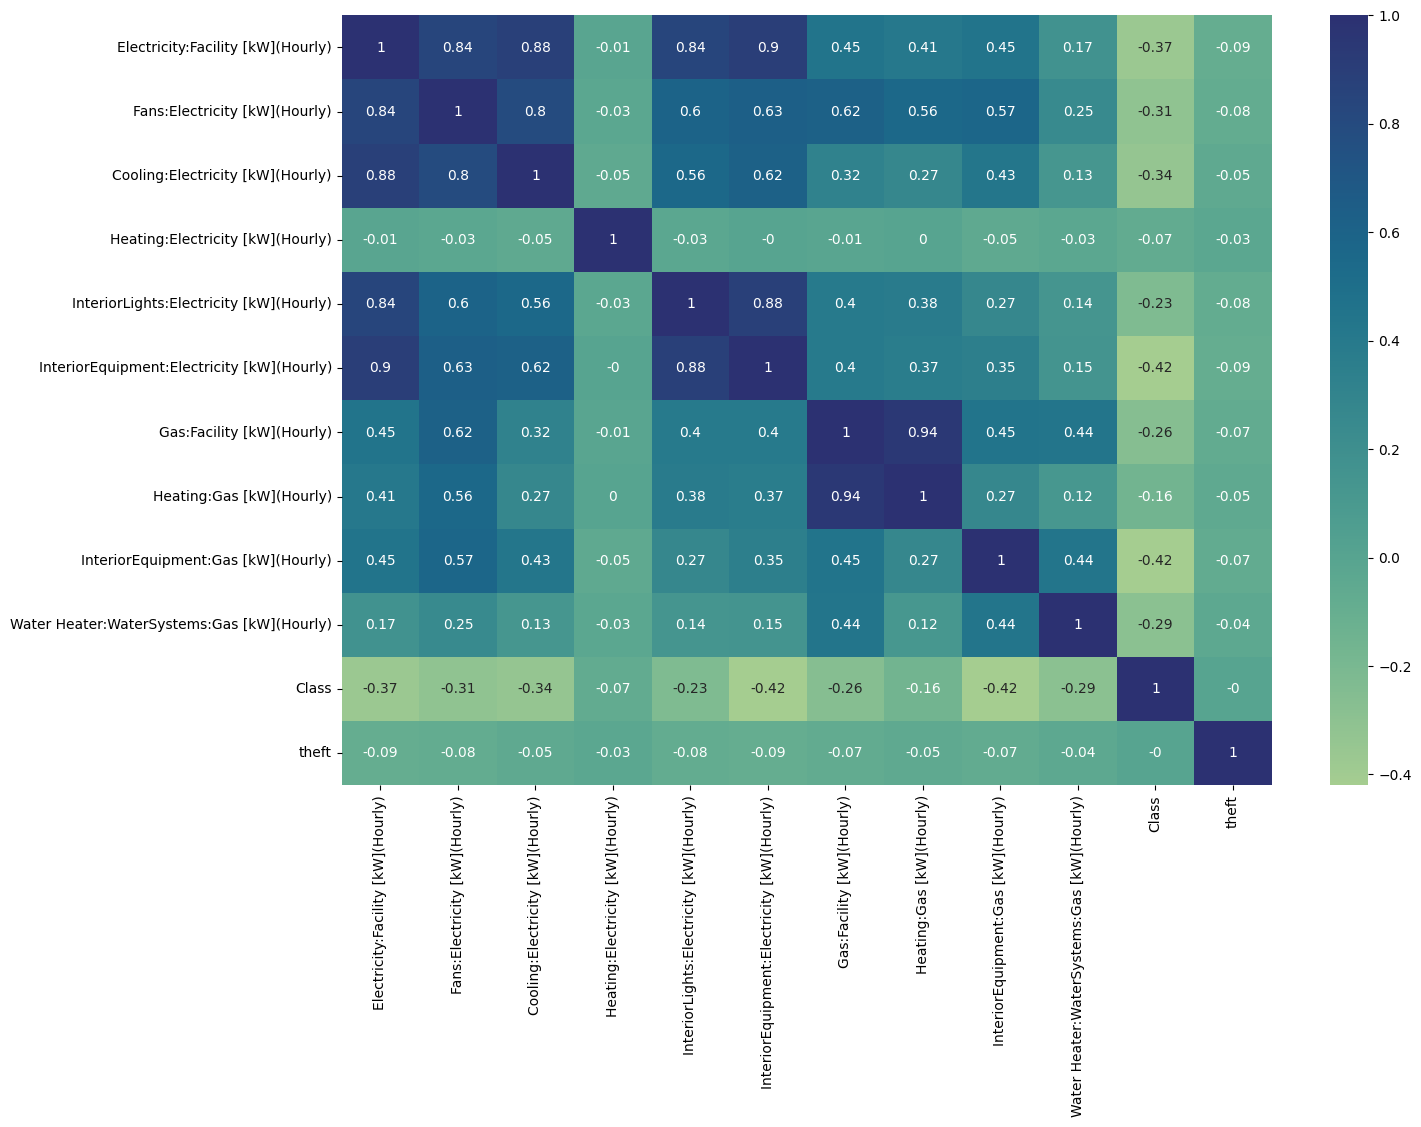

In [18]:
#correlation matrix
correlation = df.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(correlation, annot = True, cmap = 'crest')

In [19]:
#splitting data into X and y.
X = df.drop('theft',axis='columns')
Y = df['theft']

In [20]:
#data is imbalanced
df['theft'].value_counts()

0    331824
1     51083
3     44349
4     41460
6     35413
5     33553
2     22958
Name: theft, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,stratify=Y)

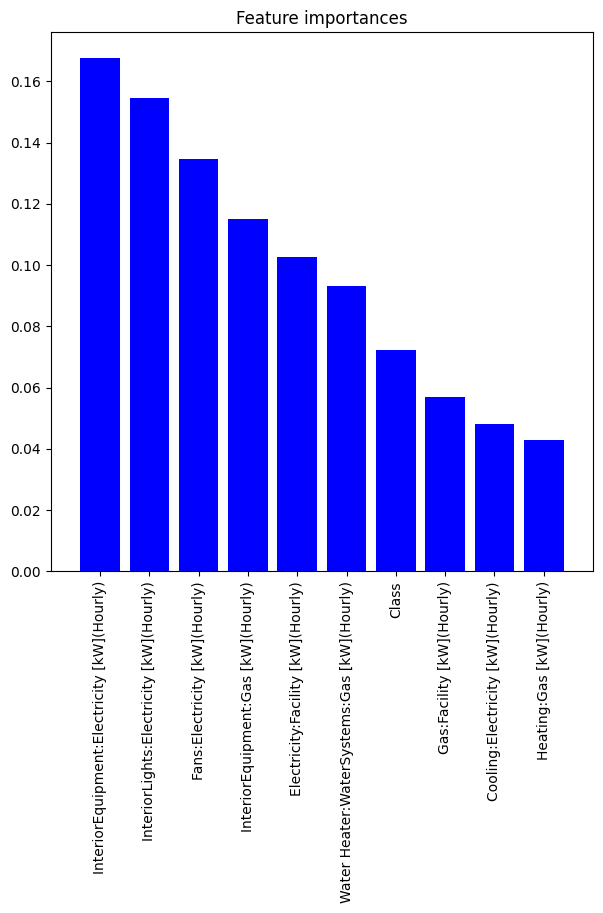

In [40]:
#model feature importance
fearture_name = X_train.columns.values
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(X_train,y_train)
#plot imp
importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:10]
plt.figure(figsize=(7,7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="b")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [41]:
select_from_model_list = fearture_name[indices].tolist()
select_from_model_list

['InteriorEquipment:Electricity [kW](Hourly)',
 'InteriorLights:Electricity [kW](Hourly)',
 'Fans:Electricity [kW](Hourly)',
 'InteriorEquipment:Gas [kW](Hourly)',
 'Electricity:Facility [kW](Hourly)',
 'Water Heater:WaterSystems:Gas [kW](Hourly)',
 'Class',
 'Gas:Facility [kW](Hourly)',
 'Cooling:Electricity [kW](Hourly)',
 'Heating:Gas [kW](Hourly)']

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(504576, 11) (56064, 11) (504576,) (56064,)


In [22]:
unique_elements = pd.unique(y_train)
count = len(unique_elements)
count

7

In [23]:
#XGB
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=587587cbd7d8d00bb2e00119837feec69bcf6bafd1f886c70585996f3b483ff9
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


# XGBoost with PSO

In [25]:
import pyswarm
from pyswarm import pso

In [ ]:
#
# Define the objective function to optimize XGBoost hyperparameters using PSO
def objective_function(params):
    # max_depth, learning_rate, n_estimators, gamma, min_child_weight = params
    max_depth, learning_rate = params

    model = xgb.XGBClassifier(
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        objective='multi:softmax',  # Multiclass classification
        num_class=len(np.unique(y_train))  # Number of classes
    )
    print("-----")
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the negative accuracy (PSO minimizes, so we negate accuracy)
    accuracy = -accuracy_score(y_test, y_pred)

    return accuracy


# Define the search space for hyperparameters
lb = [1, 0.01]  # Lower bounds for max_depth, learning_rate
ub = [10, 0.3] # Upper bounds for max_depth, learning_rate

# Use PSO to optimize the hyperparameters
# best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=50)
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=1)

# Extract the best hyperparameters
best_max_depth, best_learning_rate = best_params

# Train the final XGBoost model with the best hyperparameters
final_model = xgb.XGBClassifier(
    max_depth=int(best_max_depth),
    learning_rate=best_learning_rate,
    objective='multi:softmax',  # Multiclass classification
    num_class=len(np.unique(y_train))  # Number of classes
)
final_model.fit(X_train, y_train)

# Make predictions on the test data with the final model
y_pred = final_model.predict(X_test)

# Evaluate the final model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy}")


-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
Stopping search: maximum iterations reached --> 1
Accuracy with Best Hyperparameters: 0.8604808789954338


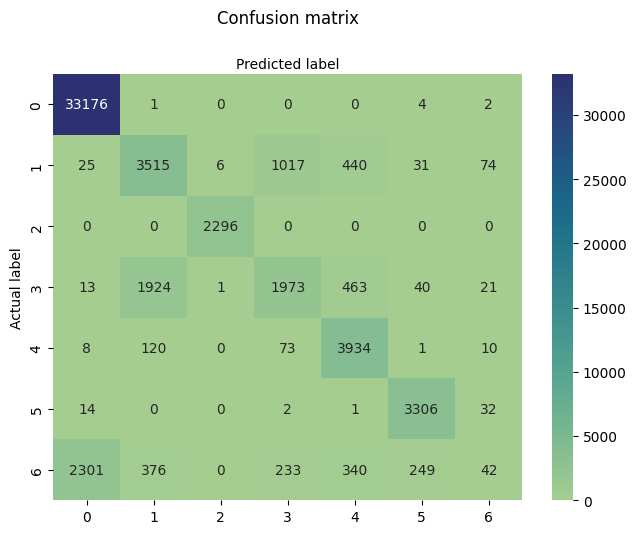

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     33183
           1       0.59      0.69      0.64      5108
           2       1.00      1.00      1.00      2296
           3       0.60      0.44      0.51      4435
           4       0.76      0.95      0.84      4146
           5       0.91      0.99      0.95      3355
           6       0.23      0.01      0.02      3541

    accuracy                           0.86     56064
   macro avg       0.72      0.73      0.70     56064
weighted avg       0.82      0.86      0.83     56064



In [ ]:
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[1,2,3,4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="crest" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Classification Report
print(classification_report(y_test, y_pred))

# Random Forest with PSO

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(504576, 11) (56064, 11) (504576,) (56064,)


In [ ]:
# Random forest Tree
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# Define the fitness function
def fitness_function(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    print("-----")

    # Create a Random Forest classifier with the specified hyperparameters
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion='gini',random_state=42)
    # model.fit(X_train, y_train)

    # Calculate cross-validation accuracy
    # accuracy = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    # Since PSO minimizes, we want to maximize accuracy, so we return its negative
    accuracy = -accuracy_score(y_test, y_pred)
    classification_report(y_test, y_pred)
    print(matrix)
    return -accuracy

# Define the parameter space
# For simplicity, let's consider n_estimators in the range of [10, 100] and max_depth in the range of [1, 20]
lb = [1, 1]  # Lower bounds for n_estimators and max_depth
ub = [2, 20]  # Upper bounds for n_estimators and max_depth

# Use PSO to find the optimal hyperparameters
best_params, _ = pso(fitness_function, lb, ub, swarmsize=10, maxiter=1)
# best_max_depth, best_learning_rate = best_params

# Extract the best hyperparameters
best_n_estimators = int(best_params[0])
best_max_depth = int(best_params[1])



-----
[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----
[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----
[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----
[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----
[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----
[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----
[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
-----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33145     4     0     0     7    24     3]
 [ 2156  1770     0   399   697    82     4]
 [    0     0  2296     0     0     0     0]
 [ 1864  1336     0   565   584    80     6]
 [ 1470   264     0    52  2345    15     0]
 [ 1912     7     0     9   122  1302     3]
 [ 2880   241     0    67   266    84     3]]
Stopping search: maximum iterations reached --> 1
Accuracy with Best Hyperparameters: 0.6328303367579908


In [ ]:
best_n_estimators,best_max_depth

(66, 1)

In [ ]:
# Train the final Random Forest classifier with the best hyperparameters
final_classifier = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, criterion='gini',random_state=42)
# final_classifier = RandomForestClassifier(n_estimators=2, criterion='gini',random_state=42)
final_classifier.fit(X_train, y_train)

# Make predictions on the test data with the final model
y_pred = final_classifier.predict(X_test)

# Evaluate the final model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy}")

Accuracy with Best Hyperparameters: 0.8339754566210046


In [ ]:
# y_pred

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     33183
           1       0.57      0.81      0.67      5108
           2       1.00      1.00      1.00      2296
           3       0.58      0.44      0.50      4435
           4       0.88      0.75      0.81      4146
           5       0.93      0.92      0.93      3355
           6       0.06      0.03      0.04      3541

    accuracy                           0.83     56064
   macro avg       0.71      0.70      0.70     56064
weighted avg       0.81      0.83      0.82     56064



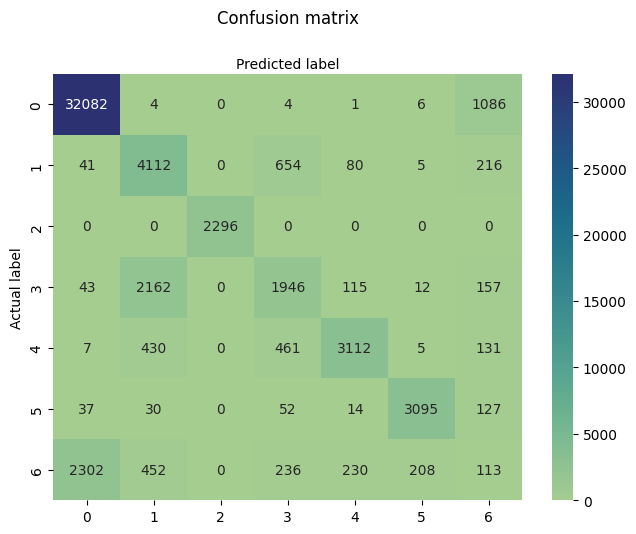

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     33183
           1       0.57      0.81      0.67      5108
           2       1.00      1.00      1.00      2296
           3       0.58      0.44      0.50      4435
           4       0.88      0.75      0.81      4146
           5       0.93      0.92      0.93      3355
           6       0.06      0.03      0.04      3541

    accuracy                           0.83     56064
   macro avg       0.71      0.70      0.70     56064
weighted avg       0.81      0.83      0.82     56064



In [ ]:
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[1,2,3,4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="crest" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Classification Report
print(classification_report(y_test, y_pred))

# Decision Tree with pso

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(504576, 11) (56064, 11) (504576,) (56064,)


In [ ]:
#Decision Tree
def fitness_function(params):
    max_depth = int(params[0])
    min_samples_split = int(params[1])

    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Since PSO minimizes, we want to maximize accuracy, so we return its negative
    accuracy = -accuracy_score(y_test, y_pred)
    print(-accuracy)
    return -accuracy  # Negative because PSO minimizes
lb = [5, 2]  # Lower bounds for max_depth and min_samples_split
ub = [10, 10]  # Upper bounds for max_depth and min_samples_split
best_params, _ = pso(fitness_function, lb, ub, swarmsize=10, maxiter=1)

best_max_depth = int(best_params[0])
best_min_samples_split = int(best_params[1])

final_classifier = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
final_classifier.fit(X_train, y_train)


0.6861800799086758
0.7312357305936074
0.712810359589041
0.712810359589041
0.7312357305936074
0.6943849885844748
0.6943849885844748
0.7312357305936074
0.7312357305936074
0.6943849885844748
0.712810359589041
0.7436501141552512
0.7312357305936074
0.7436501141552512
0.666220747716895
0.6943849885844748
0.6943849885844748
0.712810359589041
0.6861800799086758
0.666220747716895
Stopping search: maximum iterations reached --> 1


DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [ ]:
# Evaluate the model's performance on a test dataset (not shown in this example)
# Make predictions on the test data with the final model
y_pred = final_classifier.predict(X_test)

# Evaluate the final model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy}")

Accuracy with Best Hyperparameters: 0.666220747716895


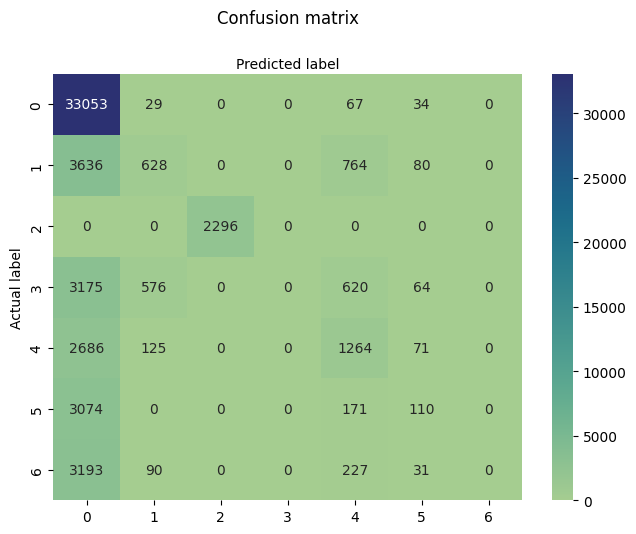

              precision    recall  f1-score   support

           0       0.68      1.00      0.81     33183
           1       0.43      0.12      0.19      5108
           2       1.00      1.00      1.00      2296
           3       0.00      0.00      0.00      4435
           4       0.41      0.30      0.35      4146
           5       0.28      0.03      0.06      3355
           6       0.00      0.00      0.00      3541

    accuracy                           0.67     56064
   macro avg       0.40      0.35      0.34     56064
weighted avg       0.53      0.67      0.56     56064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[1,2,3,4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="crest" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Classification Report
print(classification_report(y_test, y_pred))

In [ ]:
y_train

0
39011     3
519452    0
101445    0
490860    0
458002    0
         ..
457631    0
220511    5
530557    5
543537    0
512190    1
Name: theft, Length: 504576, dtype: int64

In [ ]:
# CNN with PSO
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(504576, 11) (56064, 11) (504576,) (56064,)


In [ ]:
X_train

Electricity:Facility [kW](Hourly)  Fans:Electricity [kW](Hourly)  \
0                                                                          
349849                         165.592756                       6.890159   
505640                        1076.000455                      87.622200   
521692                           0.000000                       0.000000   
269175                         166.031734                      25.398563   
398086                          68.853409                       7.629663   
...                                   ...                            ...   
303313                         303.416014                      37.135666   
467970                          19.730060                       0.591778   
81566                          433.469817                      70.235790   
145493                          45.890369                       4.088366   
533064                          58.448099                      13.106755   

        Cooling:Electricity [kW](Hourly)  Heating:Electricity [kW](Hourly)  \
0                                                                            
349849                          0.000000                          0.000000   
505640                        698.472327                          0.000000   
521692                          0.000000                          0.000000   
269175                          0.695908                          0.000000   
398086                         20.296357                          0.000000   
...                                  ...                               ...   
303313                         89.221392                          0.000000   
467970                          2.380178                          0.000000   
81566                           0.000000                          0.000000   
145493                          9.606964                          0.000000   
533064                          0.000000                          0.188151   

        InteriorLights:Electricity [kW](Hourly)  \
0                                                 
349849                                80.527626   
505640                               220.879908   
521692                                 0.000000   
269175                                 6.987380   
398086                                32.837857   
...                                         ...   
303313                                32.180462   
467970                                 3.827051   
81566                                220.879908   
145493                                 9.179851   
533064                                34.382155   

        InteriorEquipment:Electricity [kW](Hourly)  Gas:Facility [kW](Hourly)  \
0                                                                               
349849                                   73.092045                 124.774046   
505640                                   53.238744                  31.264788   
521692                                    0.000000                   0.000000   
269175                                   14.149973                  45.195101   
398086                                    8.089532                   0.000000   
...                                            ...                        ...   
303313                                   77.539730                 216.379229   
467970                                    7.574053                   0.792556   
81566                                   137.835547                 482.271324   
145493                                   19.424500                  19.011903   
533064                                   10.771038                  11.841134   

        Heating:Gas [kW](Hourly)  InteriorEquipment:Gas [kW](Hourly)  \
0                                                                      
349849                118.679618                             3.20568   
505640                  0.000000                             4.83426  

# CNN with pso

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from pyswarm import pso
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

def fitness_function(params):
    learning_rate, num_filters, kernel_size, num_neurons = params
    print(learning_rate, num_filters, kernel_size, num_neurons)
    # Reshape the data to be suitable for a CNN
    X_train_reshaped = X_train.values.reshape(-1, X_train.shape[1], 1, 1)
    X_test_reshaped = X_test.values.reshape(-1, X_test.shape[1], 1, 1)

    # Define the model
    model = Sequential()
    model.add(Conv2D(num_filters, (int(kernel_size),1), activation='relu', input_shape=(X_train.shape[1], 1, 1), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 1)))
    model.add(Flatten())
    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_reshaped, y_train, epochs=2, verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)

    return -accuracy  # Negative accuracy for maximization

lb = [1, 8,3,8]  # Lower bounds for max_depth and min_samples_split
ub = [2, 216,9,64]  # Upper bounds for max_depth and min_samples_split
best_params, _ = pso(fitness_function, lb, ub, swarmsize=10, maxiter=1)

# Extract the best hyperparameters
best_learning_rate, best_num_filters, best_kernel_size, best_num_neurons = best_params

# Build and train the CNN with the best hyperparameters
best_model = Sequential()
best_model.add(Conv2D(int(best_num_filters), (int(best_kernel_size), 1), activation='relu', input_shape=(X_train.shape[1], 1, 1), padding='same'))
best_model.add(MaxPooling2D(pool_size=(2, 1)))
best_model.add(Flatten())
best_model.add(Dense(int(best_num_neurons), activation='relu'))
best_model.add(Dense(7, activation='softmax'))

best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

1.0844871537761738 155.14360592924518 5.780464271314763 19.85226135778252
1.1352608061005616 32.50764266216257 8.160421701649904 8.755127869255666
1.3743074632432362 46.30225313801625 5.654314344914017 47.08407266167038
1.880521027088649 159.6127197517225 4.3128459133580375 14.555425807937556
1.6537958334649057 66.08723765939212 6.0907692109697695 52.152881426611685
1.245512183176733 53.468764235771914 6.929107129051991 39.23900994409851
1.8402101282246512 142.1610548606175 6.162510532917861 48.50022668635589
1.1835074802820045 82.2421350955397 5.344021414348475 25.047875158586912
1.2364523259295075 150.20646401136602 5.331637281715525 22.03628967671147
1.4809833933571859 118.55462129206012 4.3160717177536085 16.961967910856597
1.0 216.0 3.538376691773946 32.265357268252714
1.0 35.21864050336684 6.908598785036401 37.10227639509626
1.7122856723714883 35.665588525814734 3.0804660583034345 31.419763930607573
1.5067112875524487 112.49623919823827 3.4066154308974728 37.75080081539975
1.3788

In [ ]:
# X_train

In [ ]:
X_train_reshaped = X_train.values.reshape(-1, X_train.shape[1], 1, 1)
X_test_reshaped = X_test.values.reshape(-1, X_test.shape[1], 1, 1)
best_model.fit(X_train_reshaped, y_train, epochs=2)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_reshaped, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/2
15768/15768 [==============================] - 59s 4ms/step - loss: 14.9641 - accuracy: 0.5914
Epoch 2/2
1752/1752 [==============================] - 4s 2ms/step - loss: 1.5069 - accuracy: 0.5919
Test Accuracy: 0.5918771624565125


In [ ]:
y_train.unique()

array([0, 2, 3, 5, 6, 4, 1])

In [ ]:
y_pred = best_model.predict(X_test_reshaped)
y_pred

1752/1752 [==============================] - 8s 4ms/step


array([[0.47123596, 0.27073756, 0.02106509, ..., 0.07435344, 0.0423843 ,
        0.06758527],
       [0.47123596, 0.27073756, 0.02106509, ..., 0.07435344, 0.0423843 ,
        0.06758527],
       [0.47123596, 0.27073756, 0.02106509, ..., 0.07435344, 0.0423843 ,
        0.06758527],
       ...,
       [0.47123596, 0.27073756, 0.02106509, ..., 0.07435344, 0.0423843 ,
        0.06758527],
       [0.47123596, 0.27073756, 0.02106509, ..., 0.07435344, 0.0423843 ,
        0.06758527],
       [0.47123596, 0.27073756, 0.02106509, ..., 0.07435344, 0.0423843 ,
        0.06758527]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

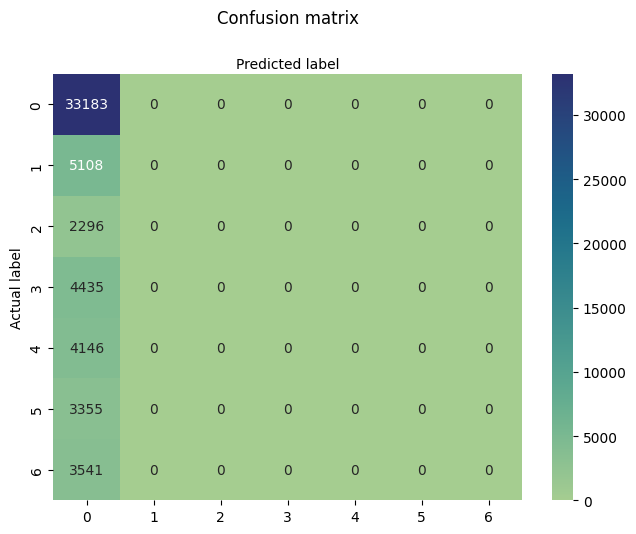

              precision    recall  f1-score   support

           0       0.59      1.00      0.74     33183
           1       0.00      0.00      0.00      5108
           2       0.00      0.00      0.00      2296
           3       0.00      0.00      0.00      4435
           4       0.00      0.00      0.00      4146
           5       0.00      0.00      0.00      3355
           6       0.00      0.00      0.00      3541

    accuracy                           0.59     56064
   macro avg       0.08      0.14      0.11     56064
weighted avg       0.35      0.59      0.44     56064



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[1,2,3,4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="crest" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Classification Report
print(classification_report(y_test, y_pred))

# LSTM with PSO


In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(504576, 11) (56064, 11) (504576,) (56064,)


In [27]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_test_new = np.argmax(y_test,axis=1)
X_train1 = np.expand_dims(X_train,axis=2)
X_test1 = np.expand_dims(X_test,axis=2)
X_test1.shape

(56064, 11, 1)

In [28]:
import pyswarms
import keras
from keras.models import Sequential
from keras.layers import Activation, LSTM, Dense, Flatten, Dropout
import numpy
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Mesher, Animator
from pyswarms.utils.plotters.formatters import Designer
import matplotlib.pyplot as plt
from IPython.display import Image

In [29]:

#import config

def plotCostHistory(optimizer):


    try:

        plot_cost_history(cost_history=optimizer.cost_history)

        plt.show()
    except:
        raise

def plotPositionHistory(optimizer, xLimits, yLimits, filename, xLabel, yLabel):


    try:

        d = Designer(limits=[xLimits, yLimits], label=[xLabel, yLabel])
        animation = plot_contour(pos_history=optimizer.pos_history,
                     designer=d)

        animation.save(filename, writer='ffmpeg', fps=30)
        Image(url=filename)

        plt.show()
    except:
        raise

def plot3D(optimizer, xValues, yValues, zValues):

    try:

        #Obtain a position-fitness matrix using the Mesher.compute_history_3d() method.
        positionHistory_3d = Mesher.compute_history_3d(optimizer.pos_history)

        d = Designer(limits=[xValues, yValues, zValues], label=['x-axis', 'y-axis', 'z-axis'])

        plot3d = plot_surface(pos_history=positionHistory_3d,
                              mesher=Mesher, designer=d,
                              mark=(1,1,zValues[0])) #BEST POSSIBLE POSITION MARK (* --> IN GRAPHIC)

        return plot3d

    except:
        raise

def plotTrainValAcc(history):

    try:

        #Train and validation accuracy
        plt.plot(history.history['accuracy'], 'b', label='Training accurarcy')
        plt.plot(history.history['val_accuracy'], 'r', label='Validation accurarcy')
        plt.title('Training and Validation accurarcy')
        plt.legend()
        plt.figure()

    except:
        raise

def plotTrainValLoss(history):

    try:

        #Train and validation loss
        plt.plot(history.history['loss'], 'b', label='Training loss')
        plt.plot(history.history['val_loss'], 'r', label='Validation loss')
        plt.title('Training and Validation loss')
        plt.legend()
        plt.show()


    except:
        raise

def confclassif(y_test_new, y_pred):
    try:
      #confusion Matrix
      matrix =confusion_matrix(y_test_new, y_pred)
      fig, ax = plt.subplots()
      sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="crest" ,fmt='g')
      ax.xaxis.set_label_position("top")
      plt.tight_layout()
      plt.title('Confusion matrix', y=1.1)
      plt.ylabel('Actual label')
      plt.xlabel('Predicted label')
      plt.show()

      #Classification Report
      print("Classification Report : ")
      print(classification_report(y_test_new, y_pred))

    except:
        raise

In [30]:

def lstm(x_train, x_test, y_train, y_test, neurons, batch_size, epochs):


    try:
        model=Sequential()
        model.add(LSTM(256, return_sequences=False, input_shape=(int(11),1)))
        model.add(Dense(units=7))
        model.add(Activation('sigmoid'))
        model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])  # CROSSENTROPY BECAUSE IT'S MORE ADEQUATED TO MULTI-CLASS PROBLEMS
        model.summary()
        #FIT MODEL
        historyOfTraining = model.fit(
            x=x_train,
            y=y_train,
            batch_size=batch_size,
            validation_data=(x_test, y_test),
            epochs=5,
            shuffle=False #IF I USE STATEFUL MODE, THIS PARAMETER NEEDS TO BE EQUALS TO FALSE
        )

        plotTrainValAcc(historyOfTraining)
        plotTrainValLoss(historyOfTraining)

        y_pred = model.predict(x_test)
        y_pred = np.argmax(y_pred,axis=1)
        y_test_new = np.argmax(y_test,axis=1)
        print ("LSTM PSO:Accuracy : ", accuracy_score(y_test_new,y_pred)*100)
        confclassif(y_test_new, y_pred)

        predict = model.predict(x=x_test, batch_size=batch_size)
        print(predict)
        print(y_test)

        predict = (predict == predict.max(axis=1)[:, None]).astype(int)
        print(predict)

        numberRights = 0
        for i in range(len(y_test)):
            indexMaxValue = numpy.argmax(predict[i], axis=0)
            if indexMaxValue == numpy.argmax(y_test[i],
                                             axis=0):  # COMPARE INDEX OF MAJOR CLASS PREDICTED AND REAL CLASS
                numberRights = numberRights + 1

        hitRate = numberRights / len(y_test)  # HIT PERCENTAGE OF CORRECT PREVISIONS

        return hitRate

    except:
        raise

In [31]:
TYPE = 'type'
OPTIONS = 'options'
GLOBAL_BEST = 'G'
LOCAL_BEST = 'L'
OPTIONS = 'options'
GLOBAL_BEST = 'G'
LOCAL_BEST = 'L'
C1 = 'c1'
C2 = 'c2'
INERTIA = 'w'
NUMBER_NEIGHBORS = 'k'
MINKOWSKI_RULE = 'p'
TYPE = 'type'
OPTIONS = 'options'
X_LABEL_FILTERS = 'n_filtros'
X_LABEL_NEURONS = 'n_neuronios'
Y_LABEL_EPOCHS = 'n_epochs'

SIGMOID = 'sigmoid'
TANH = 'tanh'
RELU = 'relu'

In [32]:
def lostFunction(particleDimension, x_train, x_test, y_train, y_test, batch_size):


    try:

        #RETRIEVE DIMENSIONS VALUES, AND I NEED TO CONVERT FLOAT VALUES (CONTINUOUS) TO INT
        neurons = int(particleDimension[0])
        epochs = int(particleDimension[1])

        #CALL LSTM_MODEL function
        accuracy = lstm(x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
                        neurons=neurons, batch_size=batch_size, epochs=epochs)

        #APPLY COST FUNCTION --> THIS FUNCTION IS EQUALS TO CNN COST FUNCTION
        loss = 1.5 * ((1.0 - (1.0/neurons)) + (1.0 - (1.0/epochs))) + 2.0 * (1.0 - accuracy)
        print(accuracy)
        return loss

    except:
        raise

def particlesLoop(particles, x_train, x_test, y_train, y_test, batch_size):


    try:

        numberParticles = particles.shape[0] #NUMBER OF PARTICLES

        allLosses = [lostFunction(particleDimension=particles[i], x_train=x_train, x_test=x_test,
                    y_train=y_train, y_test=y_test, batch_size=batch_size) for i in range(1)]

        return allLosses #NEED TO RETURN THIS PYSWARMS NEED THIS

    except:
        raise

def applyLSTM_PSO(x_train, x_test, y_train, y_test, batch_size, numberParticles, iterations, dimensions, bounds, **kwargs):


    try:

        #GET KWARG type ARGUMENT
        topology = kwargs.get(TYPE)

        #INITIALIZATION OF PSO --> CONSIDERING TWO POSSIBLE TOPOLOGIES gbest AND lbest
        optimizer = None
        if topology == GLOBAL_BEST:
            optimizer = pyswarms.single.GlobalBestPSO(n_particles=numberParticles, dimensions=dimensions,
                                                      options=kwargs.get(OPTIONS), bounds=bounds)
        elif topology == LOCAL_BEST:
            optimizer = pyswarms.single.LocalBestPSO(n_particles=numberParticles, dimensions=dimensions,
                                                      options=kwargs.get(OPTIONS), bounds=bounds)
        else:
            raise AttributeError

        #PSO OPTIMIZATION PASSING LOOP PARTICLES ITERATION FUNCTION particlesLoop, applying lstm for all particle in all iterations
        cost, pos = optimizer.optimize(particlesLoop, x_train=x_train, x_test=x_test, y_train=y_train,
                                       y_test=y_test, batch_size=batch_size,iters=iterations)

        return cost, pos, optimizer

    except:
        raise

2023-11-01 16:30:44,389 - pyswarms.single.local_best - INFO - Optimize for 1 iters with {'c1': 0.3, 'c2': 0.2, 'w': 0.9, 'k': 4, 'p': 2}
pyswarms.single.local_best:   0%|          |0/1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 7)                 1799      
                                                                 
 activation (Activation)     (None, 7)                 0         
                                                                 
Total params: 265991 (1.01 MB)
Trainable params: 265991 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
15768/15768 [==============================] - 86s 5ms/step - loss: 1.0443 - accuracy: 0.6557 - val_loss: 0.8568 - val_accuracy: 0.7084
Epoch 2/5
15768/15768 [==============================] - 91s 6ms/step - loss: 0.7058 - accuracy: 0.7490 - val_loss: 0.6291 - val_accuracy:

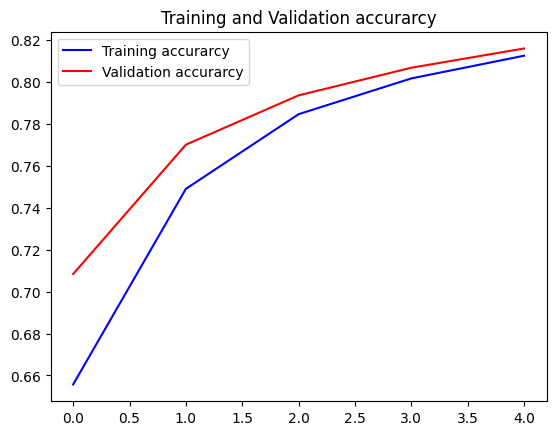

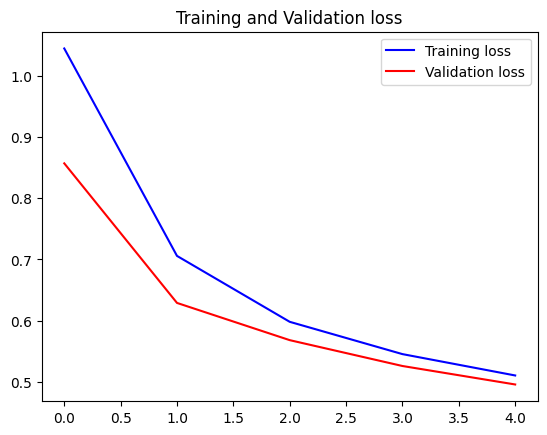

1752/1752 [==============================] - 5s 3ms/step
LSTM PSO:Accuracy :  81.59603310502284


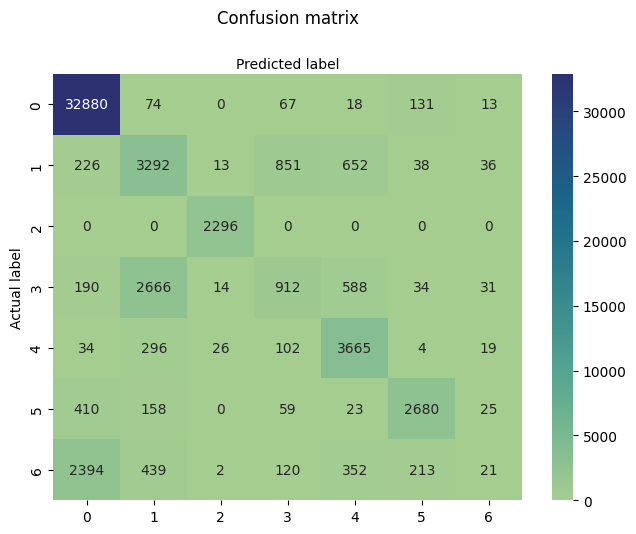

Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     33183
           1       0.48      0.64      0.55      5108
           2       0.98      1.00      0.99      2296
           3       0.43      0.21      0.28      4435
           4       0.69      0.88      0.78      4146
           5       0.86      0.80      0.83      3355
           6       0.14      0.01      0.01      3541

    accuracy                           0.82     56064
   macro avg       0.64      0.65      0.63     56064
weighted avg       0.77      0.82      0.78     56064

1752/1752 [==============================] - 4s 3ms/step
[[9.9768102e-01 7.7652000e-02 1.7950815e-06 ... 1.8762577e-04
  2.4421297e-01 9.7705305e-01]
 [2.0953234e-02 9.5352536e-01 2.7883654e-05 ... 4.8418143e-01
  3.9585191e-04 6.9647950e-01]
 [3.0458146e-03 8.3333480e-01 9.9960691e-01 ... 9.4385725e-01
  3.6785283e-04 6.5096396e-01]
 ...
 [1.9946203e-02 8.0997109e-01 3.19954

pyswarms.single.local_best: 100%|██████████|1/1, best_cost=3.21
2023-11-01 16:39:34,970 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 3.2132210383044018, best pos: [38.1827959  13.28124607]
2023-11-01 16:39:34,995 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2023-11-01 16:39:34,999 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1000x800 -pix_fmt rgba -r 30 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y lstmParticlesPosConvergence.mp4


0.8159603310502284
3.2132210383044018
[38.1827959  13.28124607]


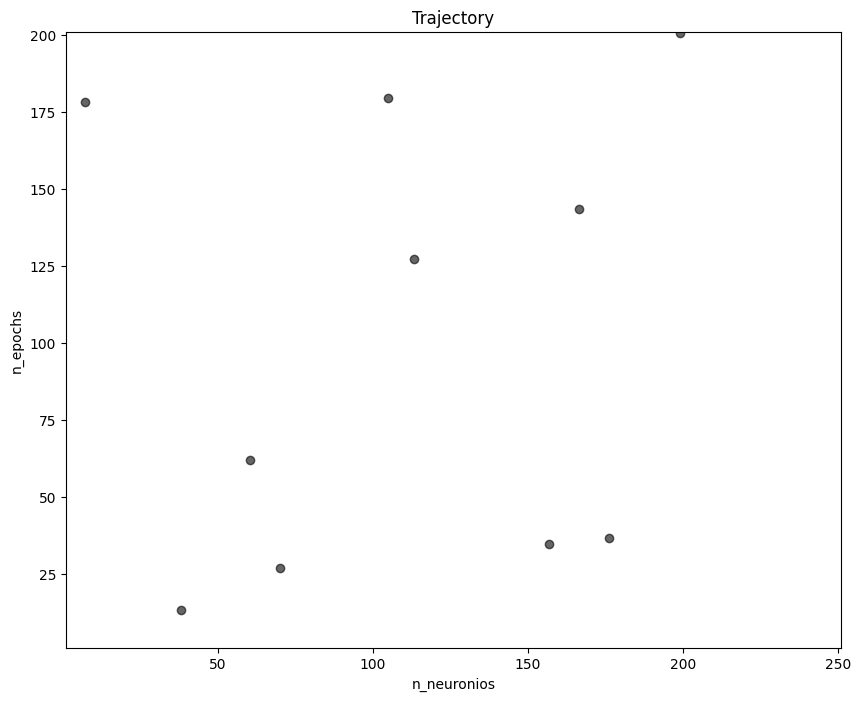

In [33]:
#LSTM WITH PSO

# #DEFINITION OF LSTM PARAMETERS, EPOCHS AND NEURONS ARE DEFINED BY PSO
batch_size = 32
#
# #DEFINITION OF PSO PARAMETERS
numberParticles = 10
iterations = 1
dimensions = 2 # [0] --> NEURONS , [1] --> EPOCHS
#
#DEFINITION OF DIMENSIONS BOUNDS, X AXIS --> NEURONS and Y AXIS --> EPOCHS
minBounds = numpy.ones(2)
maxBounds = numpy.ones(2)
maxBounds[0] = 251 #I REDUCE THIS DIMENSIONS, IN ORDER TO MAKE OPTIMIZATION MORE QUICKLY
maxBounds[1] = 201
bounds = (minBounds, maxBounds)
#
#DEFINITION OF DIFFERENT TOPOLOGIES OPTIONS
lbest_options = {C1 : 0.3, C2 : 0.2, INERTIA : 0.9, NUMBER_NEIGHBORS : 4, MINKOWSKI_RULE : 2}
lbest_kwargs = {TYPE : LOCAL_BEST, OPTIONS : lbest_options}
gbest_options = {C1 : 0.3, C2 : 0.2, INERTIA : 0.9}
gbest_kwargs = {TYPE : GLOBAL_BEST, OPTIONS : gbest_options}
#
#PASSING ALL THIS OPTIONS TO LSTM_PSO applyLSTM_PSO FUNCTION
cost, pos, optimizer = applyLSTM_PSO(x_train=X_train1, x_test=X_test1, y_train=y_train, y_test=y_test, batch_size=batch_size,
                                              numberParticles=numberParticles, iterations=iterations, dimensions=dimensions,
                                              bounds=bounds, **lbest_kwargs)
print(cost)
print(pos)
#
#PLOT GRAPHICS ILLUSTRATING THE COST VARIATION AND PARTICLES MOVEMENT AND CONVERGENCE

#plotCostHistory(optimizer=optimizer)
plotPositionHistory(optimizer=optimizer, xLimits=(minBounds[0], maxBounds[0]),
                          yLimits=(minBounds[1], maxBounds[1]), filename='lstmParticlesPosConvergence.mp4',
                          xLabel=X_LABEL_NEURONS, yLabel=Y_LABEL_EPOCHS)
